In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm

import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-recsys/tab_6_city.csv
/kaggle/input/test-recsys/sample_submission.csv
/kaggle/input/test-recsys/sbermarket_tab_2_6/tab_2_products_2020-08-18.csv
/kaggle/input/test-recsys/sbermarket_tab_2_6/tab_2_products_2020-08-28.csv
/kaggle/input/test-recsys/sbermarket_tab_2_6/tab_2_products_2020-08-08.csv
/kaggle/input/test-recsys/sbermarket_tab_2_6/tab_2_products_2020-09-07.csv
/kaggle/input/test-recsys/sbermarket_tab_2_5/tab_2_products_2020-07-09.csv
/kaggle/input/test-recsys/sbermarket_tab_2_5/tab_2_products_2020-07-19.csv
/kaggle/input/test-recsys/sbermarket_tab_2_5/tab_2_products_2020-07-29.csv
/kaggle/input/test-recsys/sbermarket_tab_2_2/tab_2_products_2020-04-30.csv
/kaggle/input/test-recsys/sbermarket_tab_2_2/tab_2_products_2020-04-10.csv
/kaggle/input/test-recsys/sbermarket_tab_2_2/tab_2_products_2020-04-20.csv
/kaggle/input/test-recsys/sbermarket_tab_2_3/tab_2_products_2020-05-10.csv
/kaggle/input/test-recsys/sbermarket_tab_2_3/tab_2_products_2020-05-30.csv
/kaggle/inp

## The share of regular customers and customers that used Sbermarket at least one time per month

In [20]:
import glob, os
# os.chdir("/kaggle/input/test-recsys/sbermarket_tab_2_1")

dirnames = ["/kaggle/input/test-recsys/sbermarket_tab_2_1",
           "/kaggle/input/test-recsys/sbermarket_tab_2_2",
           "/kaggle/input/test-recsys/sbermarket_tab_2_3",
           "/kaggle/input/test-recsys/sbermarket_tab_2_4",
           "/kaggle/input/test-recsys/sbermarket_tab_2_5",
           "/kaggle/input/test-recsys/sbermarket_tab_2_6"]

user_order_dict = {}
k = 0

for dirname in dirnames:
    for filename in tqdm(os.listdir(dirname)):
        products = pd.read_csv(os.path.join(dirname, filename)).loc[:,
                                            ["user_id", "order_id"]].drop_duplicates()
        for raw in products.itertuples():
            if user_order_dict.get(raw.user_id) is None:
                user_order_dict[raw.user_id] = [0]*27
            
            user_order_dict[raw.user_id][k] += 1
        
        k += 1

100%|██████████| 4/4 [00:35<00:00,  8.76s/it]


In [21]:
regular_customers = 0


for k in user_order_dict:
    if np.prod(user_order_dict[k][:26]) > 0:
        regular_customers += 1

In [22]:
regular_customers, len(user_order_dict), regular_customers / len(user_order_dict)

(93, 657502, 0.00014144443667091507)

In [70]:
print("the share of regular customers -", round(regular_customers / len(user_order_dict)*100, 3), "percent")

the share of regular customers - 0.014 percent


In [28]:
permonth_customers = 0


for k in user_order_dict:
    if np.array(user_order_dict[k]).reshape(-1, 3).sum(axis=-1).prod() > 0:
        permonth_customers += 1

In [30]:
permonth_customers, len(user_order_dict), permonth_customers / len(user_order_dict)

(4404, 657502, 0.006698078484932366)

In [71]:
print("the share of customers that used  at least one time per month -", round(permonth_customers / len(user_order_dict)*100, 3), "percent")

the share of customers at least one time per month - 0.67 percent


## The analisys of popularity of brands for three most popular categories of products

most popular categories

In [31]:
dirnames = ["/kaggle/input/test-recsys/sbermarket_tab_2_1",
           "/kaggle/input/test-recsys/sbermarket_tab_2_2",
           "/kaggle/input/test-recsys/sbermarket_tab_2_3",
           "/kaggle/input/test-recsys/sbermarket_tab_2_4",
           "/kaggle/input/test-recsys/sbermarket_tab_2_5",
           "/kaggle/input/test-recsys/sbermarket_tab_2_6"]

category_dict = {}

for dirname in dirnames:
    for filename in tqdm(os.listdir(dirname)):
        products = pd.read_csv(os.path.join(dirname, filename)).loc[:,
                                            ["parent_category_id"]]
        for raw in products.itertuples():
            category_dict[raw.parent_category_id] = category_dict.get(raw.parent_category_id, 0) + 1

100%|██████████| 4/4 [00:51<00:00, 12.94s/it]


In [33]:
sorted(category_dict.items(), key=lambda item: item[1], reverse=True)[:5]

[(20, 9434861), (84, 5915790), (9, 4931658), (56, 3989316), (119, 2627425)]

In [35]:
categories = pd.read_csv("/kaggle/input/test-recsys/kaggle_tab_1345/tab_3_categories.csv")

In [51]:
categories[categories.id.isin([20, 84, 9])]

,id,name,parent_id
8,9,Бакалея,1
19,20,"Молочные продукты, яйца",1
83,84,"Овощи, зелень, грибы",1


getting the frequency of occurrence of brands for each chosen category

In [53]:
dirnames = ["/kaggle/input/test-recsys/sbermarket_tab_2_1",
           "/kaggle/input/test-recsys/sbermarket_tab_2_2",
           "/kaggle/input/test-recsys/sbermarket_tab_2_3",
           "/kaggle/input/test-recsys/sbermarket_tab_2_4",
           "/kaggle/input/test-recsys/sbermarket_tab_2_5",
           "/kaggle/input/test-recsys/sbermarket_tab_2_6"]

category_brand_dict = {}

for dirname in dirnames:
    for filename in tqdm(os.listdir(dirname)):
        products = pd.read_csv(os.path.join(dirname, filename)).loc[:,
                                            ["brand_name", "parent_category_id"]].dropna()
        products = products[products["parent_category_id"].isin([20, 84, 9])]
        
        for raw in products.itertuples():
            if raw.brand_name is not None:
                d = category_brand_dict.get(raw.parent_category_id, {})
                d[raw.brand_name] = d.get(raw.brand_name, 0) + 1
                category_brand_dict[raw.parent_category_id] = d

100%|██████████| 4/4 [00:43<00:00, 10.89s/it]


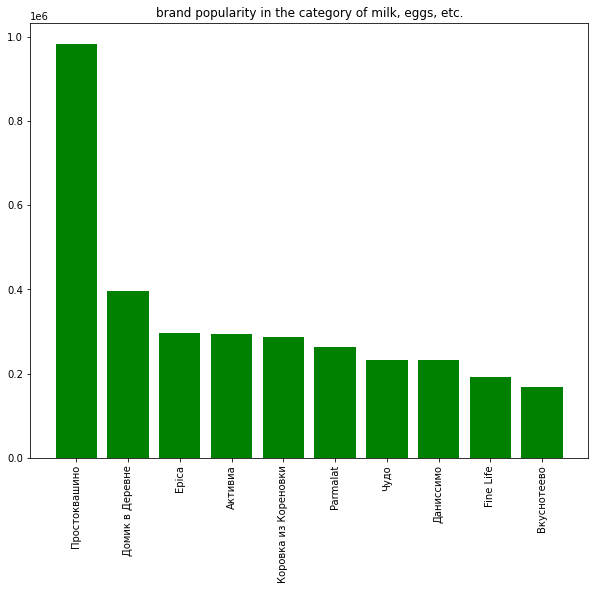

In [61]:
milk_dict = sorted(category_brand_dict[20].items(), key=lambda x : x[1], reverse=True)[:10]

plt.figure(figsize=(10, 8))

plt.title("brand popularity in the category of milk, eggs, etc.")

plt.bar([x[0] for x in milk_dict], [x[1] for x in milk_dict], color='g')

plt.xticks([x[0] for x in milk_dict], rotation='vertical')

plt.show()

In [63]:
del category_brand_dict[84]["Без бренда"]

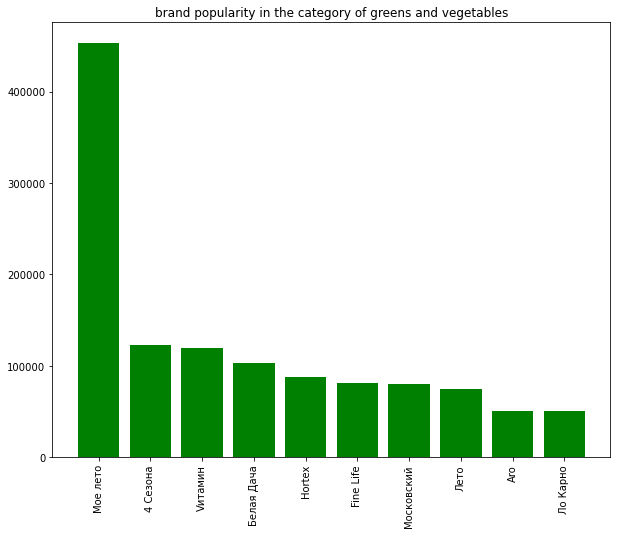

In [65]:
veg_dict = sorted(category_brand_dict[84].items(), key=lambda x : x[1], reverse=True)[:10]

plt.figure(figsize=(10, 8))

plt.title("brand popularity in the category of greens and vegetables")

plt.bar([x[0] for x in veg_dict], [x[1] for x in veg_dict], color='g')

plt.xticks([x[0] for x in veg_dict], rotation='vertical')

plt.show()

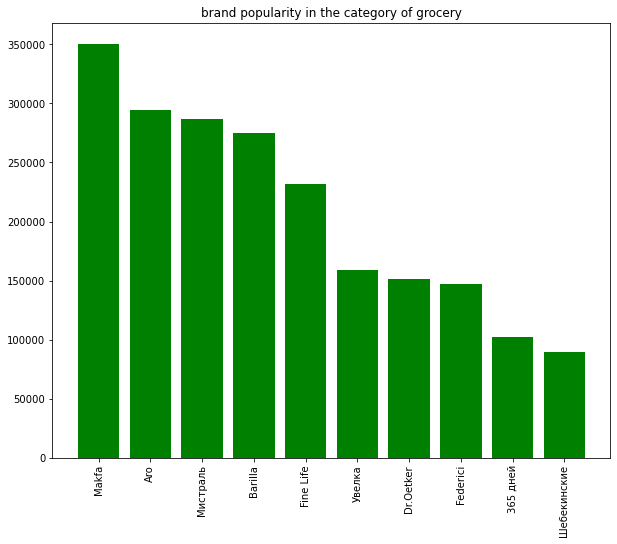

In [67]:
veg_dict = sorted(category_brand_dict[9].items(), key=lambda x : x[1], reverse=True)[:10]

plt.figure(figsize=(10, 8))

plt.title("brand popularity in the category of grocery")

plt.bar([x[0] for x in veg_dict], [x[1] for x in veg_dict], color='g')

plt.xticks([x[0] for x in veg_dict], rotation='vertical')

plt.show()